<a href="https://colab.research.google.com/github/yugasaimanikanta0313/Simple/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("smart_home_energy_consumption_large.csv")

df.columns = ["Home_ID", "Appliance_Type", "Energy_Consumption", "Time", "Date",
              "Outdoor_Temperature", "Season", "Household_Size"]

df.fillna(df.median(numeric_only=True), inplace=True)

label_encoder_appliance = LabelEncoder()
df["Appliance_Type"] = label_encoder_appliance.fit_transform(df["Appliance_Type"])

label_encoder_season = LabelEncoder()
df["Season"] = label_encoder_season.fit_transform(df["Season"])

df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

df["Hour"] = df["Time"].apply(lambda x: int(x.split(":")[0]))

df.drop(columns=["Date", "Time"], inplace=True)

df.head()


,Home_ID,Appliance_Type,Energy_Consumption,Outdoor_Temperature,Season,Household_Size,Year,Month,Day,Hour
0,94,3,0.20,-1.0,0,2,2023,12,2,21
1,435,7,0.23,31.1,2,5,2023,8,6,20
2,466,2,0.32,21.3,0,3,2023,11,21,6
3,496,4,3.92,-4.2,3,1,2023,1,21,21
4,137,6,0.44,34.5,2,5,2023,8,26,4


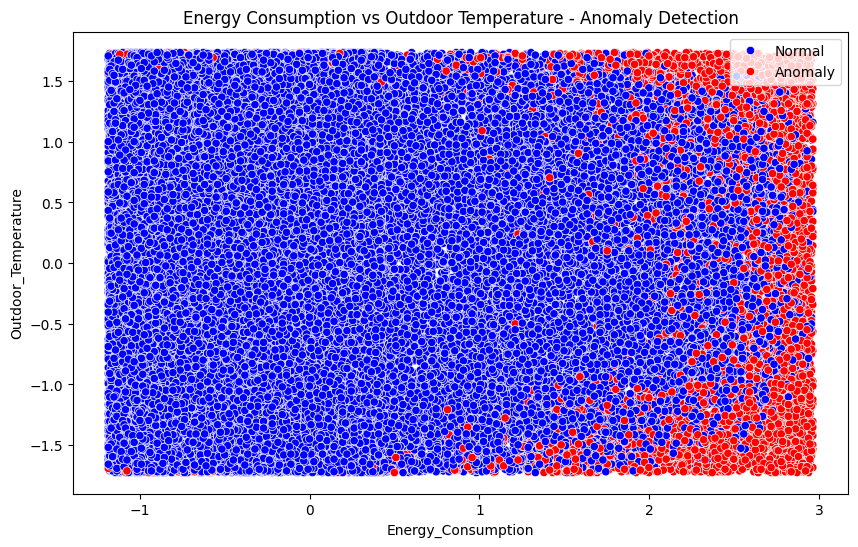

,Home_ID,Appliance_Type,Energy_Consumption,Outdoor_Temperature,Season,Household_Size,Year,Month,Day,Hour,Anomaly_Score,Anomaly
0,94,3,-1.100563,-1.104681,0,-0.706931,2023,12,2,1.373653,1,Normal
1,435,7,-1.075164,1.118514,2,1.410114,2023,8,6,1.229263,1,Normal
2,466,2,-0.998969,0.439781,0,-0.001249,2023,11,21,-0.792186,1,Normal
3,496,4,2.048857,-1.326308,3,-1.412612,2023,1,21,1.373653,-1,Anomaly
4,137,6,-0.897374,1.353992,2,1.410114,2023,8,26,-1.080964,1,Normal


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["Energy_Consumption", "Outdoor_Temperature", "Household_Size", "Hour"]] = scaler.fit_transform(
    df_scaled[["Energy_Consumption", "Outdoor_Temperature", "Household_Size", "Hour"]]
)

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_scaled["Anomaly_Score"] = iso_forest.fit_predict(df_scaled[["Energy_Consumption", "Outdoor_Temperature", "Household_Size", "Hour"]])

df_scaled["Anomaly"] = df_scaled["Anomaly_Score"].map({1: "Normal", -1: "Anomaly"})

df_scaled.to_csv("anomaly_detection_results.csv", index=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x="Energy_Consumption", y="Outdoor_Temperature", hue="Anomaly", palette={"Normal": "blue", "Anomaly": "red"})
plt.title("Energy Consumption vs Outdoor Temperature - Anomaly Detection")
plt.legend()
plt.savefig("anomaly_visualization.png")
plt.show()

df_scaled.head()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

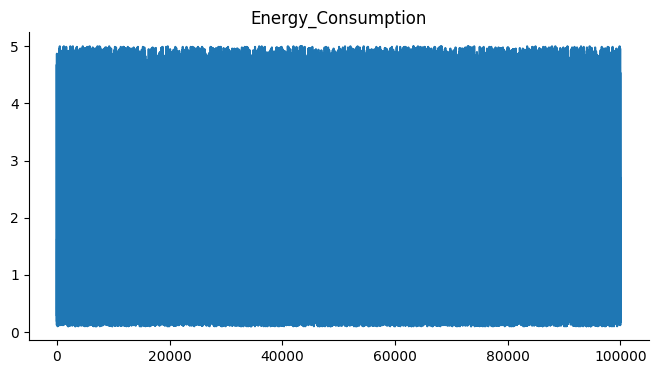

In [ ]:
# @title Energy_Consumption

from matplotlib import pyplot as plt
df['Energy_Consumption'].plot(kind='line', figsize=(8, 4), title='Energy_Consumption')
plt.gca().spines[['top', 'right']].set_visible(False)

Anomaly
Normal     95000
Anomaly     5000
Name: count, dtype: int64
Anomaly results saved to: anomaly_detection_results.csv


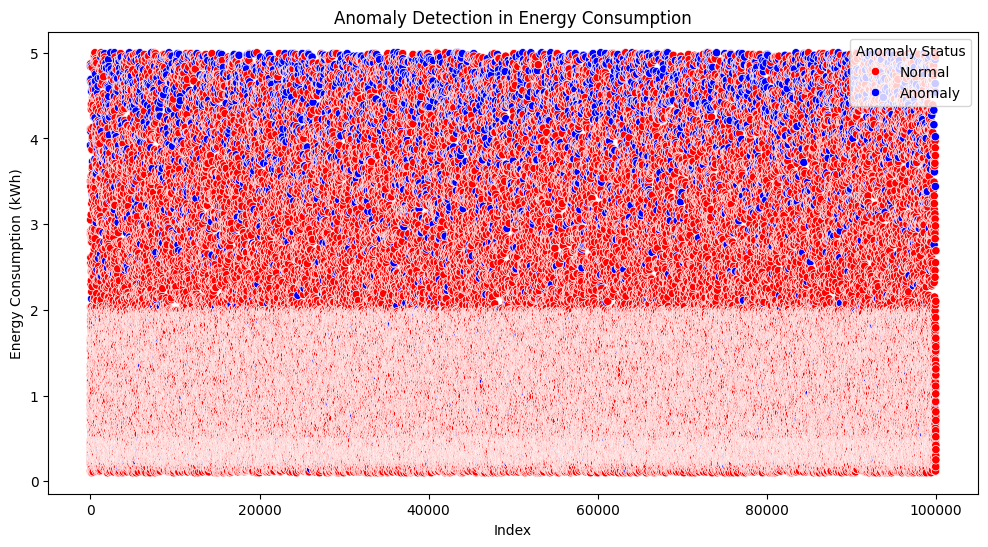

Anomaly detection plot saved to: anomaly_detection_plot.png


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "smart_home_energy_consumption_large.csv"
df = pd.read_csv(file_path)

df.columns = ["Home_ID", "Appliance_Type", "Energy_Consumption", "Time", "Date",
              "Outdoor_Temperature", "Season", "Household_Size"]

df.fillna(df.median(numeric_only=True), inplace=True)

df["Appliance_Type"] = df["Appliance_Type"].astype("category").cat.codes
df["Season"] = df["Season"].astype("category").cat.codes

df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

df["Hour"] = df["Time"].apply(lambda x: int(x.split(":")[0]))

df.drop(columns=["Date", "Time"], inplace=True)

features = ["Energy_Consumption", "Outdoor_Temperature", "Household_Size",
            "Appliance_Type", "Season", "Year", "Month", "Day", "Hour"]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(df_scaled)

df["Anomaly"] = df["Anomaly"].map({1: "Normal", -1: "Anomaly"})

print(df["Anomaly"].value_counts())

csv_file_path = "anomaly_detection_results.csv"
df.to_csv(csv_file_path, index=False)
print(f"Anomaly results saved to: {csv_file_path}")

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df["Energy_Consumption"], hue=df["Anomaly"], palette=["red", "blue"])
plt.title("Anomaly Detection in Energy Consumption")
plt.xlabel("Index")
plt.ylabel("Energy Consumption (kWh)")
plt.legend(title="Anomaly Status")

png_file_path = "anomaly_detection_plot.png"
plt.savefig(png_file_path)
plt.show()

plt.close()
print(f"Anomaly detection plot saved to: {png_file_path}")
